In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [2]:
# generators is use to very large amount of data


train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
# normalize

def process(image, label):
    image = tf.cast(image/256., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 98ms/step - loss: 0.6153 - accuracy: 0.6489 - val_loss: 0.5061 - val_accuracy: 0.7566
Epoch 2/10
625/625 [==============================] - 62s 98ms/step - loss: 0.4782 - accuracy: 0.7688 - val_loss: 0.4491 - val_accuracy: 0.7924
Epoch 3/10
625/625 [==============================] - 61s 97ms/step - loss: 0.3852 - accuracy: 0.8214 - val_loss: 0.4653 - val_accuracy: 0.7952
Epoch 4/10
625/625 [==============================] - 60s 95ms/step - loss: 0.2753 - accuracy: 0.8771 - val_loss: 0.6761 - val_accuracy: 0.7832
Epoch 5/10
625/625 [==============================] - 60s 96ms/step - loss: 0.1646 - accuracy: 0.9342 - val_loss: 0.8040 - val_accuracy: 0.7700
Epoch 6/10
625/625 [==============================] - 60s 96ms/step - loss: 0.0969 - accuracy: 0.9627 - val_loss: 1.2477 - val_accuracy: 0.7622
Epoch 7/10
625/625 [==============================] - 60s 95ms/step - loss: 0.0737 - accuracy: 0.9740 - val_loss: 1.0781 - val_accuracy:

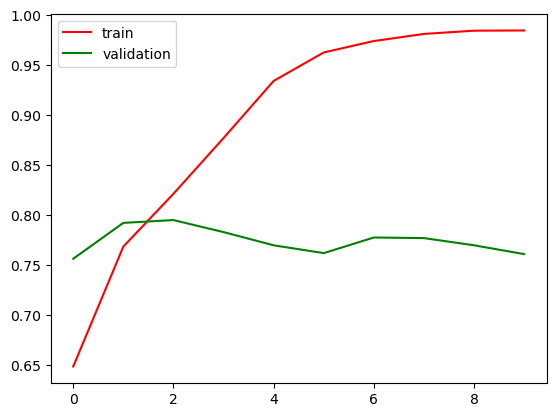

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='green', label='validation')
plt.legend()
plt.show()

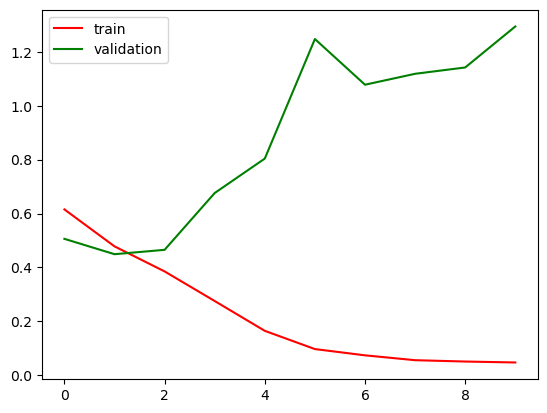

In [9]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='green', label='validation')
plt.legend()
plt.show()

## way to reduce overfittin

~add more data

~data augmentation

~l1/l2 regularizer

~dropout

~batch norm

~reduce complexity

## model Optimization

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history2 = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 96s 152ms/step - loss: 1.5210 - accuracy: 0.6054 - val_loss: 0.6074 - val_accuracy: 0.6776
Epoch 2/10
625/625 [==============================] - 96s 154ms/step - loss: 0.5607 - accuracy: 0.7106 - val_loss: 0.5153 - val_accuracy: 0.7452
Epoch 3/10
625/625 [==============================] - 94s 151ms/step - loss: 0.5060 - accuracy: 0.7556 - val_loss: 0.5910 - val_accuracy: 0.6894
Epoch 4/10
625/625 [==============================] - 94s 151ms/step - loss: 0.4626 - accuracy: 0.7832 - val_loss: 0.5024 - val_accuracy: 0.7514
Epoch 5/10
625/625 [==============================] - 94s 150ms/step - loss: 0.3860 - accuracy: 0.8218 - val_loss: 0.4295 - val_accuracy: 0.8016
Epoch 6/10
625/625 [==============================] - 94s 150ms/step - loss: 0.3284 - accuracy: 0.8561 - val_loss: 2.6476 - val_accuracy: 0.5036
Epoch 7/10
625/625 [==============================] - 94s 150ms/step - loss: 0.2591 - accuracy: 0.8913 - val_loss: 0.5844 - val_ac

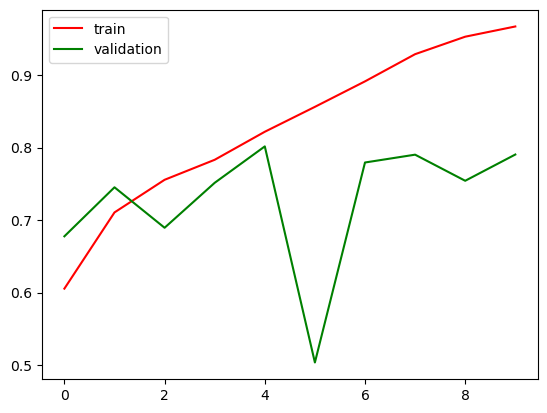

In [21]:
plt.plot(history2.history['accuracy'], color='red', label='train')
plt.plot(history2.history['val_accuracy'], color='green', label='validation')
plt.legend()
plt.show()

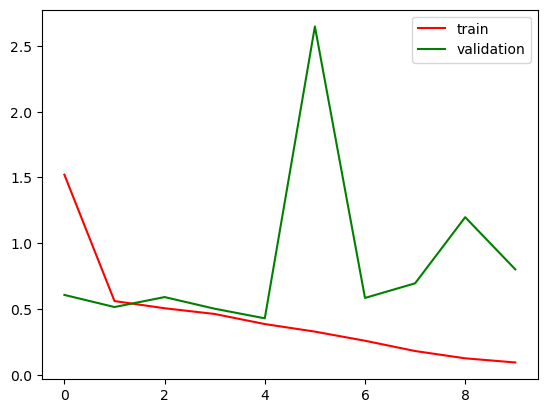

In [22]:
plt.plot(history2.history['loss'], color='red', label='train')
plt.plot(history2.history['val_loss'], color='green', label='validation')
plt.legend()
plt.show()

In [23]:
import cv2

In [24]:
test_img = cv2.imread('doges.jpg')

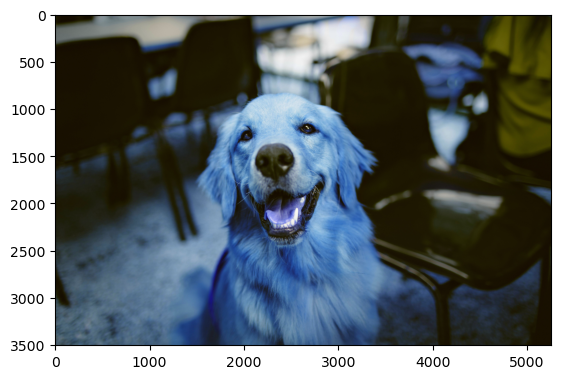

In [25]:
plt.imshow(test_img)

In [26]:
test_img.shape

(3505, 5257, 3)

In [30]:
test_img = cv2.resize(test_img,(256, 256))

In [31]:
test_input = test_img.reshape(1, 256, 256, 3)

In [32]:
model.predict(test_input)

1/1 [==============================] - 0s 419ms/step


array([[1.]], dtype=float32)

In [33]:
test_img = cv2.imread('cat.jpg')

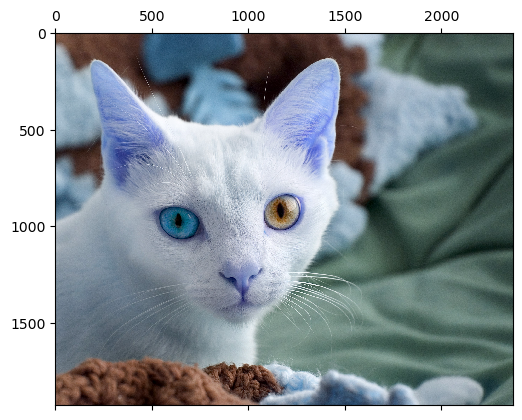

In [35]:
plt.matshow(test_img)

In [36]:
test_img = cv2.resize(test_img,(256, 256))
test_input = test_img.reshape(1, 256, 256, 3)

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 35ms/step


array([[0.]], dtype=float32)